## Creating Fake Data

In [26]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 200

## Visualizing the Data

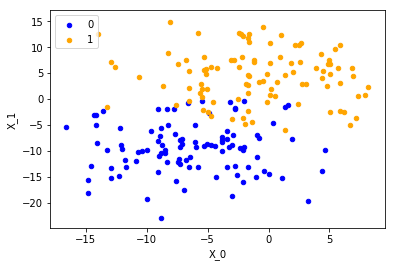

In [28]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

## Logistic Model

In [6]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def hx(w,X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))
    return sigmoid(z)

## Cost Function - Binary Cross Entropy 

In [8]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

## Gradient Descent

In [9]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    return g

In [10]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
            return w_new
        
        if j>1000: 
            return w_new
        j+=1

## Initializing Parameters

In [29]:
w=[1,1,1] 

## Training the Model

In [30]:
w = descent(w,w,.0099)
print(w)

[1, 1, 1]
126.96627984087802
[1.2539422898588644, -0.5512710240837779, 1.1843328109648115]
112.81815690482537
[1.2400289717256012, 1.3365539538600526, 1.3041857280167006]
168.5749357223354
[1.496038556709955, -0.26091766794801896, 1.498589948744304]
75.77036936925771
[1.552998152697941, 0.5805338886016641, 1.2059963033700993]
67.88063552779857
[1.7129970823802407, -0.12884219161477717, 0.9205552719943874]
49.631255078140065
[1.721522374547689, 0.8081464107255731, 0.784948881261807]
84.65164447415044
[1.9318934810214365, -0.5853214217947893, 0.9260582355386137]
137.02236299684375
[1.792209433897121, 2.259519445068961, 1.8717281361304319]
296.375960910099
[2.0717704014100984, 0.4671501798576154, 2.2375086018139254]
96.21982855549399
[2.2275891867070294, 0.17556932949773574, 1.7757719140648793]
66.93614685472798
[2.34635073219192, 0.10042351859759649, 1.3377088708014218]
47.88369966457564
[2.420814222298708, 0.2006649466226462, 0.9803329461122527]
35.74059972551982
[2.47109414690982, 0.15

[3.8633288986724876, 0.8506129210112683, 1.0498464143051243]
55.74402658296074
[3.9676742188862173, 0.03128933728901728, 0.9613800859692181]
45.74407867147495
[3.869288923226128, 0.9292323548893828, 1.0933108786645422]
62.995571849041305
[3.991526151445602, -0.006432089938303798, 1.0263902851785334]
48.76624110475652
[3.896743953393092, 0.9664943016903068, 1.1316289522636744]
66.49355757389534
[4.025496879100698, -0.002860471850847701, 1.0642023940910663]
48.401784986853514
[3.937927785462077, 0.9269409320036377, 1.134592375224428]
62.2844950023375
[4.05625706029725, 0.03594237606392425, 1.0412964429502327]
45.386330877054675
[3.9718527881566703, 0.8589014507494593, 1.1031275817812503]
55.83975891250693
[4.072920169954746, 0.08263187006759731, 0.9862882169070408]
42.28798978906928
[3.9882178367642505, 0.7954976567305269, 1.0623334090023673]
50.52968300416344
[4.072976229016115, 0.11956955046625717, 0.9348665829608025]
40.22843311978853
[3.987389531348227, 0.7490672041711901, 1.03026854

[4.07148100161309, 0.07953537276358313, 0.9904626104750668]
42.46799532722525
[3.9869196599880974, 0.7991524714258683, 1.0648545702825476]
50.82388678198927
[4.072659290914875, 0.1174288519426161, 0.9377080506154107]
40.33511455363933
[3.9871080233230067, 0.7517536594741253, 1.0319731603966975]
47.30105280924591
[4.060803016873126, 0.1410257421096871, 0.9024291151985276]
39.14516148908432
[3.974947787945598, 0.7217835695558752, 1.0108289769128669]
45.3250164863938
[4.041481761505863, 0.15266510434692393, 0.8818798458244088]
38.544157547264724
[3.95561214265283, 0.7063238643810588, 0.9984804729408264]
44.41707138297017
[4.0190283659240045, 0.15508763320703645, 0.87081419647644]
38.347438740643746
[3.9327362901869893, 0.7040073586514398, 0.992963472325375]
44.36402533780495
[3.996574851730418, 0.14954786318019386, 0.8668695352131072]
38.51175659928922
[3.909065078230233, 0.7149939983943078, 0.993907077190379]
45.16212698981873
[3.976798137021953, 0.1359483769141535, 0.8702380009991677]
3

[3.9436862885013455, 0.7034412134988091, 0.9947288081735268]
44.28473275107894
[4.006891256135132, 0.15312377991040993, 0.8678493175059132]
38.38778252423497
[3.920065576950964, 0.7081025883192766, 0.9926208861346395]
44.673897171603876
[3.98552616289925, 0.1433888028362027, 0.8676320090239222]
38.760970930770654
[3.8969865356856066, 0.7267348647537284, 0.9972532752403517]
45.988547097603664
[3.9682993258630868, 0.12496517573374222, 0.875760256475018]
39.6315674561307
[3.8770732296045485, 0.7620079584780967, 1.0100981686854555]
48.55398316770977
[3.958412684507092, 0.09542703198721414, 0.8962741529310732]
41.28533757135909
[3.8636747380810297, 0.8184742162405492, 1.0342232376498672]
53.01931003904882
[3.96005040580289, 0.05226664350362831, 0.9361640943646456]
44.164800548796556
[3.8620373633438545, 0.8964854761427252, 1.073095955218841]
59.915401590981276
[3.977311946154148, 0.00495445082450352, 0.9985450633548913]
47.83496895398823
[3.879946323323128, 0.9628107278130494, 1.11891786830

[3.9339057224084013, 0.7038430915030631, 0.9930989355499972]
44.34902106572982
[3.997649757701713, 0.14998920933116, 0.8669173333925888]
38.49546184682384
[3.910219903250042, 0.7141484507859024, 0.9937151335418063]
45.1024598604923
[3.977682593054222, 0.1368114065690349, 0.8698875916730249]
39.05457155711667
[3.8881338465290485, 0.7392892098854921, 1.0015210615998578]
46.883709492927345
[3.963095796064013, 0.11412792798045002, 0.8825262722447149]
40.205492933588424
[3.8704743072471306, 0.7828139345821158, 1.0186103175295997]
50.14566029899646
[3.957471807086085, 0.07899882088806431, 0.9101850759886997]
42.320977395040586
[3.8612021517561677, 0.8491267277175483, 1.0486502298210654]
55.63283978021868
[3.965291882075834, 0.031410957775735326, 0.9600287739545967]
45.727422079865114
[3.866762228904181, 0.9297466170049531, 1.0928644556355336]
63.072442884690716
[3.9892318739423316, -0.007627173163835654, 1.0265347676323224]
48.86038408866892
[3.8943108505311503, 0.9689026523599453, 1.1323885

[3.878573038400497, 0.9611361720418364, 1.117084403395281]
66.10888171634475
[4.007099030481601, -0.011746766017787236, 1.0549451333704298]
49.159251321358546
[3.916403134996578, 0.9541631647797068, 1.1394322186145014]
65.10978161189746
[4.041634569728822, 0.013959234369753881, 1.0601833824998241]
47.03302007443268
[3.9564694069230018, 0.8926913535964409, 1.1216261486714583]
58.95821430322678
[4.066188512493873, 0.060573626055624885, 1.0144609095812882]
43.67183936173525
[3.9819689351673992, 0.823931015039943, 1.0814694817085384]
52.83384983211516
[4.074090945966982, 0.10359503567766548, 0.9574901338051892]
41.07501099451111
[3.988881336946886, 0.7689581370681907, 1.043959365181229]
48.52741909310984
[4.066895454274406, 0.1329674420030066, 0.9147920427224334]
39.54594017461206
[3.9810832063826527, 0.7322125164927688, 1.0182807433355983]
45.98714216541363
[4.050026958841657, 0.14911635117935396, 0.8889417695393904]
38.73607116876464
[3.964178224061762, 0.7110583723219558, 1.002666871623

42.43958131335438
[3.9870080935765895, 0.7985533998462659, 1.0644477611295207]
50.77667095549178
[4.072593560839277, 0.11775362386744082, 0.9372406521102845]
40.31820416444827
[3.987035838596069, 0.7513463098177801, 1.0316909943684072]
47.27278039379047
[4.060629662887106, 0.14120925351196734, 0.9021432922591521]
39.13602806932888
[3.9747747052293394, 0.7215412254534533, 1.0106544847113639]
45.30997885113268
[4.041254055606731, 0.15273982110384643, 0.881716368726144]
38.53993056492802
[3.9553835822559105, 0.7062239324631379, 0.9983845480672623]
44.41173453556045
[4.0187842762483985, 0.15507399773805453, 0.8707329006186233]
38.34707041418269
[3.93248440077616, 0.7040450628472191, 0.9929354815309813]
44.36740530471279
[3.996343926949316, 0.14945143101785074, 0.8668605411970621]
38.515339768772634
[3.9088167798191185, 0.7151787254461113, 0.9939496979944911]
45.175166913233156
[3.9766087375689607, 0.13576073297714486, 0.8703153195420715]
39.1032589182953
[3.8869036920411317, 0.741301269004

[3.958874054663847, 0.09873725182576898, 0.8936514284473782]
41.08609976638541
[3.864481357264884, 0.8122111005993154, 1.0313818526461014]
52.50178381767613
[3.9592423306438067, 0.056781545543818646, 0.9314365454363296]
43.840096114044655
[3.861446783109477, 0.8887967398439414, 1.068886776571765]
59.20207832431552
[3.9749769759475173, 0.008633473852741602, 0.9921863088982498]
47.53550230575738
[3.8772454469808837, 0.9592603351556263, 1.115184084151584]
65.9299859836664
[4.005449490941367, -0.011964799229176148, 1.0530620521428908]
49.181645325993486
[3.914384783009101, 0.9562478827464488, 1.1393180004279115]
65.33286977146128
[4.040151804191962, 0.012031236028576031, 1.0613969665786471]
47.18433932435152
[3.954844886376232, 0.8959908958785245, 1.1232067877731002]
59.27156434413033
[4.0653992177900244, 0.0583375275430037, 1.0171677140478312]
43.819914103610486
[3.981208025504428, 0.826910263503051, 1.0834329040341764]
53.08298183906804
[4.074097579186393, 0.10188074913269352, 0.95992213

## Visualizing the Result

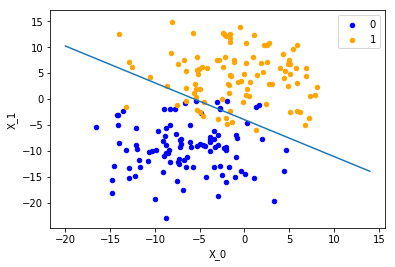

In [32]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()